In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

(-0.1, 0.1)

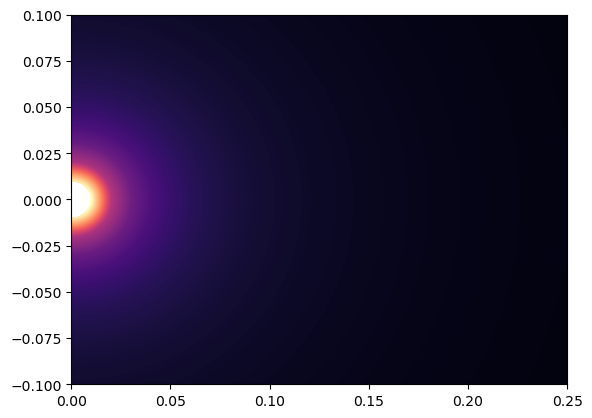

In [13]:
def e_field(r, theta, phi):
    k = 1 / 4*np.pi*constants.epsilon_0
    const = k / r

    Er = const*3
    Etheta = const*2*np.sin(theta)*np.cos(theta)*np.sin(phi)
    Ephi = const*np.sin(theta)*np.cos(phi)
    
    E_mag = np.sqrt(Er**2 + Etheta**2 + Ephi**2)

    return E_mag

r = np.linspace(0.01, 1, 100)
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)

R, Theta, Phi = np.meshgrid(r, theta, phi)

E_field = e_field(R, Theta, Phi)
E_field = E_field[:, :, 0]

X = R * np.sin(Theta) * np.cos(Phi)
Y = R * np.sin(Theta) * np.sin(Phi)
Z = R * np.cos(Theta)

lim = 0.1
plt.contourf(X[:, :, 0], Z[:, :, 0], E_field, levels = 1000, cmap = 'magma')
plt.xlim(0, 2.5*lim)
plt.ylim(-lim,lim)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mu_0 = 4*np.pi*1e-7  # Permeability of free space

# Define the loop of wire
b = 3  # Radius of the loop

# Define the observation grid
r = np.linspace(0.001, 10, 100)  # r from slightly above 0 to 3 times the loop radius
theta = np.linspace(0, 2*np.pi, 100)  # theta from 0 to 2*pi
z = np.linspace(0, 10, 100)
R, Theta = np.meshgrid(r, theta)

# Calculate the magnetic field components
B_r = np.zeros_like(R)
B_theta = np.zeros_like(Theta)

for i in range(len(R)):
    for j in range(len(Theta)):
        r_value = r[i]
        theta_value = theta[j]

        B_r[i, j] = 0  # No radial component since we're considering a circular loop
        B_theta[i, j] = (mu_0 / (4*np.pi)) * (1 / r_value) * b**2 * np.sin(theta_value) / (r_value**2 + b**2 - 2*r_value*b*np.cos(theta_value))

# Calculate the total magnetic field magnitude
B_mag = np.sqrt(B_r**2 + B_theta**2)

X = R*np.cos(Theta)
Y = R*np.sin(Theta)

# Plot
lim = 10
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, B_mag, levels=200, cmap='magma')
plt.colorbar(contour, label='Magnetic Field Magnitude (T)')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.title('Magnetic Field of a Circular Loop of Wire')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def magnetic_field(r, theta, R, I):
    # Calculate the magnetic field components in polar coordinates
    mu_0 = 4 * np.pi * 10**-7
    B_r = 0
    #B_r = (mu_0 * I * b**2) / (2 * np.pi * (r**2 + b**2 - 2 * r * b * np.cos(theta))**(3/2))
    B_theta = (mu_0*I*b**2*np.sin(theta)) / (2 * np.pi * (r**2 + b**2)**(3/2))
    #B_theta = (mu_0*I*b**2) / (2*(r**2 + b**2)**(3/2))

    return B_r, B_theta

# Circular loop parameters
b = 0.5  # Radius of the loop
I = 1  # Current through the loop

r = np.linspace(0.001, 1, 100)
theta = np.linspace(0, 2*np.pi, 100)
R, Theta = np.meshgrid(r, theta)

# Calculate the magnetic field components
B_r, B_theta = magnetic_field(R, Theta, b, I)
B_mag = np.sqrt(B_r**2 + B_theta**2)

X = R*np.cos(Theta)
Z = R*np.sin(Theta)

# Create a contour plot
lim = 5
plt.figure(figsize=(8, 6))
plt.contourf(X, Z, B_mag, cmap='magma', levels=200)
plt.colorbar(label='|B| (T)')
plt.title('Magnetic Field of Circular Loop')
plt.show()


C:\Users\Kian Hayes\AppData\Local\Temp\ipykernel_16376\1728674937.py:68: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(ScalarMappable(norm=loop1.norm, cmap=loop1.cmap))


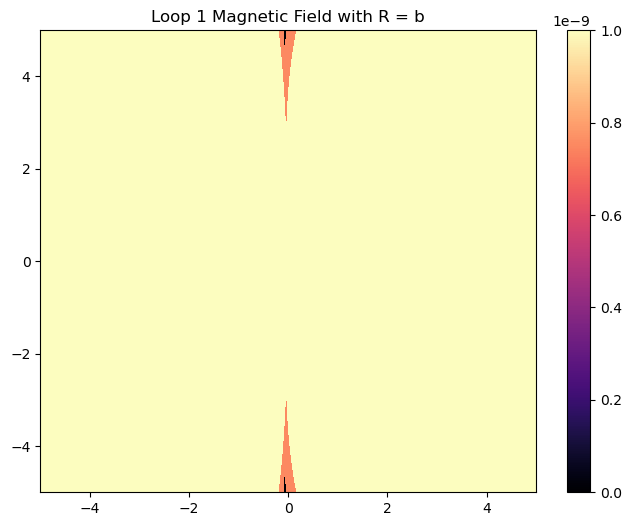

C:\Users\Kian Hayes\AppData\Local\Temp\ipykernel_16376\1728674937.py:76: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(ScalarMappable(norm=loop2.norm, cmap=loop2.cmap))


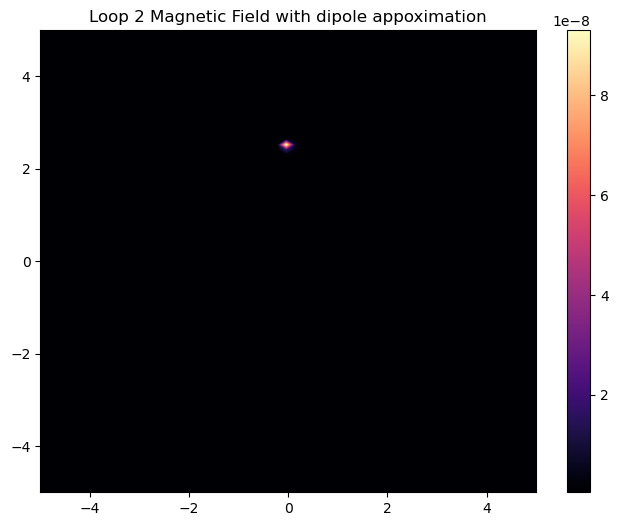

C:\Users\Kian Hayes\AppData\Local\Temp\ipykernel_16376\1728674937.py:84: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(ScalarMappable(norm=loop3.norm, cmap=loop3.cmap))


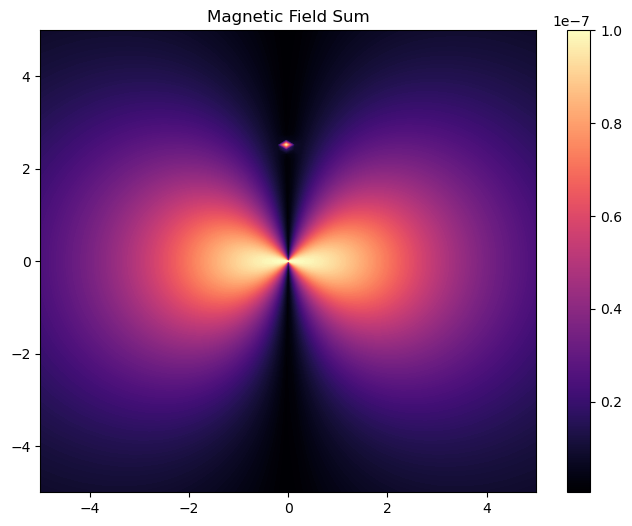

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from scipy import constants

def loop_magnetic_field(r, theta, R, I):
    Br = 0
    Btheta = (constants.mu_0 * I * R**2 * np.cos(theta)) / (2 * np.pi * (r**2 + R**2)**(3/2))

    return Br, Btheta

def dipole_magnetic_field(r, theta, R, I):
    # Have to add the calculation of the magnetic field due to an induced emf. To calculate emf we can use (emf = -M*dI_1/dt) and give the loops some internal resistance in order to calculate
    # emf = I_2R_2. Solving this for I_2 we get the induced current due to the change in current of the other loop. Now that we have this current we can add it to the internal current that it may have
    # in order to get the total current flowing through the loop. We use this current then to find the magnetic field. 
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    area = np.pi*R**2
    m = I*area
    const = (constants.mu_0*m)/(4*np.pi*(np.sqrt(x**2 + (y - 2.5)**2))**3)
    Br = const*2*np.cos(theta)
    Btheta = const*np.sin(theta)
    
    return Br, Btheta

# Initializing values
lim = 5 # Bounds for plot
r = np.linspace(0.001, 10, 100)  # Polar radial distance
theta = np.linspace(0, 2*np.pi, 100)  # Polar angle
ts = np.linspace(0,10,3) # Time array
ms = [] # Magnetic moment list for dipole
R, Theta = np.meshgrid(r, theta) # Polar coordinates meshgrid
f = 50 # Frequency of current
omega = 2*constants.pi*f # Angular frequency of current
I0 = 2 # Peak current
Is = [] # Empty current list for plotting
j = 0 # Inital index for file naming
b = 4 # Radius of loop of wire
a = 0.4e-2 # Radius of little loop of wire
z = (1/2)*lim # Separation between loops
res = 1

'''
M = (constants.mu_0*np.pi*a**2*b**2) / (2*(b**2 + z**2)**(3/2))
emf = -M*(I/ts)
I_induced = emf / res
I_total = I0 + I_induced
'''

Br_loop, Btheta_loop = loop_magnetic_field(R, Theta, R=b, I=I0)
B_mag_loop = np.sqrt(Br_loop**2 + Btheta_loop**2)

Br_loop2, Btheta_loop2 = dipole_magnetic_field(R, Theta, R=a, I=I0)
B_mag_loop2 = np.sqrt(Br_loop2**2 + Btheta_loop2**2)

# Convert polar coordinates to Cartesian coordinates
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

vmin = 0
vmax = 1e-9

# Plot magnetic field using contour plot
plt.figure(figsize=(8, 6))
loop1 = plt.contourf(X, Y, B_mag_loop, levels=200, cmap='magma', extend='both', vmax=vmax, vmin=vmin)
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.title(f'Loop 1 Magnetic Field with R = b')
plt.colorbar(ScalarMappable(norm=loop1.norm, cmap=loop1.cmap))
plt.show()

plt.figure(figsize=(8, 6))
loop2 = plt.contourf(X, Y, B_mag_loop2, levels=200, cmap='magma', extend='both')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.title(f'Loop 2 Magnetic Field with dipole appoximation')
plt.colorbar(ScalarMappable(norm=loop2.norm, cmap=loop2.cmap))
plt.show()

plt.figure(figsize=(8, 6))
loop3 = plt.contourf(X, Y, B_mag_loop2 + B_mag_loop, levels=200, cmap='magma', extend='both')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.title(f'Magnetic Field Sum')
plt.colorbar(ScalarMappable(norm=loop3.norm, cmap=loop3.cmap))
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from scipy import constants
import os
 
def dipole_magnetic_field(r, theta, R, I, shift):
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    area = np.pi*R**2
    m = I*area
    const = (constants.mu_0*m)/(4*np.pi*(np.sqrt(x**2 + (y - shift)**2))**3)
    Br = const*2*np.cos(theta)
    Btheta = const*np.sin(theta)
    
    return Br, Btheta

def loop_magnetic_field(r, theta, R, I):
    Br = 0
    Btheta = (constants.mu_0 * I * R**2 * np.cos(theta)) / (2 * np.pi * (r**2 + R**2)**(3/2))

    return Br, Btheta

# Initializing values
lim = 2.5 # Bounds for plot
r = np.linspace(0.001, 10, 100)  # Polar radial distance
theta = np.linspace(0, 2*np.pi, 100)  # Polar angle
ms = [] # Magnetic moment list for dipole
R, Theta = np.meshgrid(r, theta) # Polar coordinates meshgrid
f = 0.25 # Frequency of current
fps = 25
duration = 10
dt = fps*duration
ts = np.linspace(0,duration,dt) # Time array
omega = 2*constants.pi*f # Angular frequency of current
I0 = 3 # Peak current
Is_a = [] # Empty current list for plotting
Is_b = [] # Empty current list for plotting
emfs_a = []
emfs_b = []
zs = []
B_dipole_list = []
B_loop_list = []
j = 1 # Inital index for file naming
b = 4 # Radius of loop of wire
a = 1 # Radius of little loop of wire
z0 = 1 # Separation between loops
resistance_a = 1e-4
resistance_b = 10
I_old_b = 0
I_old_a = 0

for t in ts:
    I = I0*np.sin(omega*t) # Flowing current in loop B
    #z = (1/40)*t**2 + z0 # Separation between two at time t
    z = z0
    M = (constants.mu_0*np.pi*a**2*b**2) / (2*(b**2 + z**2)**(3/2)) # Mutual Inductance as a function of z
    emf_a = -M*((I - I_old_b)/dt) # Induced emf in Loop A and B
    I_induced_a = emf_a / resistance_a # Induced current in Loop A due to change in current in Loop B
    emf_b = -M*((I_induced_a - I_old_a)/dt)
    I_induced_b = emf_b / resistance_b # Induced current in loop B due to change in current in loop A
    I_total_b = I + I_induced_b

    Is_a.append(I_induced_a)
    Is_b.append(I_total_b)
    emfs_a.append(emf_a)
    emfs_b.append(emf_b)
    zs.append(z)

    Br_loop, Btheta_loop = loop_magnetic_field(R, Theta, R=b, I=I_total_b)
    B_mag_loop = np.sqrt(Br_loop**2 + Btheta_loop**2)

    #B_loop_list.append(B_mag_loop[1][1])

    Br_dipole, Btheta_dipole = dipole_magnetic_field(R, Theta, R=a, I=I_induced_a, shift=z)
    B_mag_dipole = np.sqrt(Br_dipole**2 + Btheta_dipole**2)

    #B_dipole_list.append(B_mag_dipole[1][1])

    I_old_b = I_total_b
    I_old_a = I_induced_a

    B_total = B_mag_loop + B_mag_dipole

    # Convert polar coordinates to Cartesian coordinates
    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)

    vmax = 1.4e-7
    vmin = 0

    print(f'Dipole Mag at {round(t, 3)}: {B_mag_dipole[50][50]}')
    print(f'Loop Mag at {round(t, 3)}: {B_mag_loop[50][50]}')
    print(f'Mag at {round(t, 3)}: {B_total[50][50]}    ')
    print(' ')
    
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X, Y, B_total, levels=200, cmap='magma', extend='both', vmin=vmin, vmax=vmax)
    plt.xlim(-lim,lim)
    plt.ylim(-lim,lim)
    plt.title(f'Magnetic Field Sum at t = {round(t,3)}')
    plt.colorbar(ScalarMappable(norm=contour.norm, cmap=contour.cmap))
    plt.savefig(f'../figures/final_animation/{j}.png')
    plt.close()

    j = j + 1


Dipole Mag at 0.0: 0.0
Loop Mag at 0.0: 0.0
Mag at 0.0: 0.0    
 


C:\Users\Kian Hayes\AppData\Local\Temp\ipykernel_21084\1255901097.py:102: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(ScalarMappable(norm=contour.norm, cmap=contour.cmap))


Dipole Mag at 0.04: 1.540278347811823e-14
Loop Mag at 0.04: 2.261596112990224e-09
Mag at 0.04: 2.261611515773702e-09    
 
Dipole Mag at 0.08: 1.5341506655402333e-14
Loop Mag at 0.08: 4.514194928559001e-09
Mag at 0.08: 4.514210270065657e-09    
 
Dipole Mag at 0.12: 1.5219196787272846e-14
Loop Mag at 0.12: 6.7488349431918975e-09
Mag at 0.12: 6.748850162388685e-09    
 
Dipole Mag at 0.161: 1.5036340458515844e-14
Loop Mag at 0.161: 8.956626098789673e-09
Mag at 0.161: 8.95664113513013e-09    
 
Dipole Mag at 0.201: 1.4793665125623615e-14
Loop Mag at 0.201: 1.1128785149945587e-08
Mag at 0.201: 1.1128799943610713e-08    
 
Dipole Mag at 0.241: 1.4492136222757577e-14
Loop Mag at 0.241: 1.3256670606290224e-08
Mag at 0.241: 1.3256685098426447e-08    
 
Dipole Mag at 0.281: 1.4132953320966155e-14
Loop Mag at 0.281: 1.5331817110892924e-08
Mag at 0.281: 1.5331831243846244e-08    
 
Dipole Mag at 0.321: 1.3717545355936586e-14
Loop Mag at 0.321: 1.734596911795232e-08
Mag at 0.321: 1.73459828354976

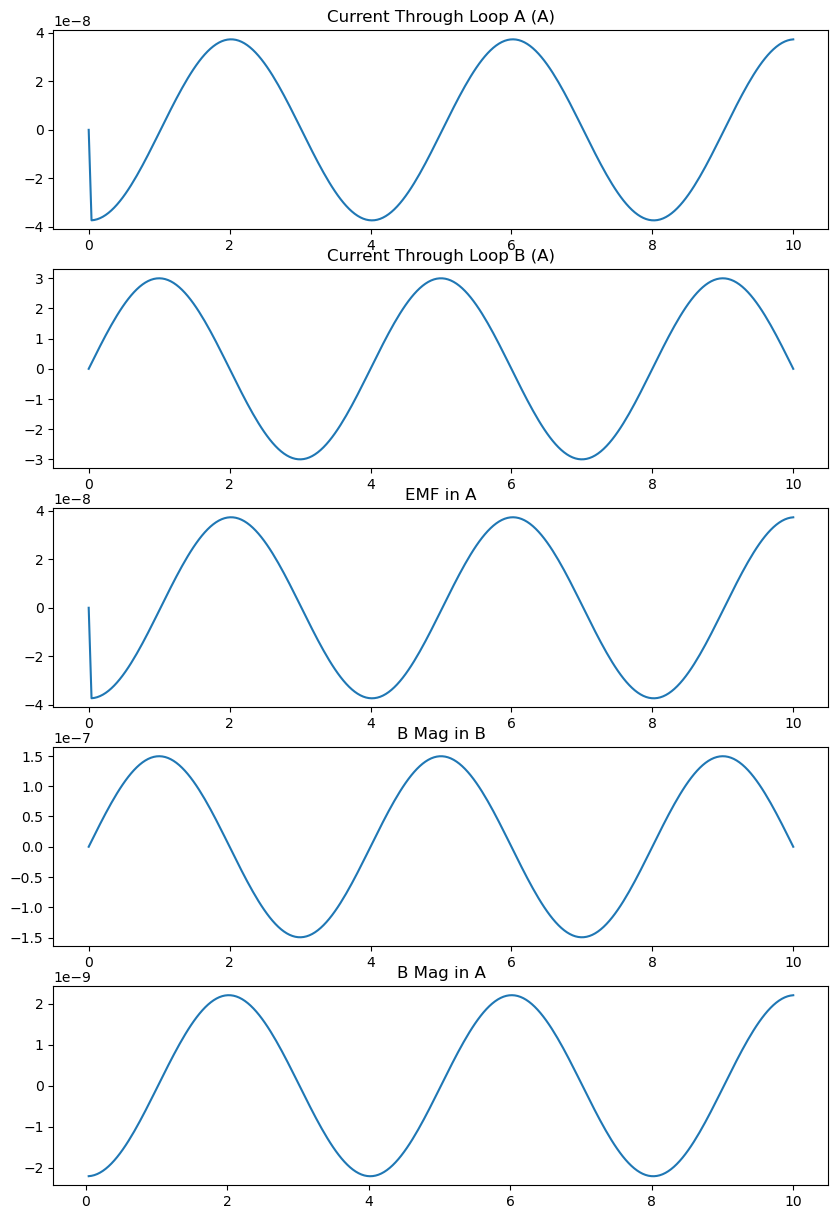

In [32]:
fig, axs = plt.subplots(5, figsize = (10,15))
axs[0].plot(ts, Is_a)
axs[0].set_title("Current Through Loop A (A)")
axs[1].plot(ts, Is_b)
axs[1].set_title("Current Through Loop B (A)")
axs[2].plot(ts, emfs_a)
axs[2].set_title('EMF in A')
axs[3].plot(ts, B_loop_list)
axs[3].set_title('B Mag in B')
axs[4].plot(ts[1:], B_dipole_list[1:])
axs[4].set_title('B Mag in A')

plt.show()